# Algorithmes de descente en optimisation différentiable sans contrainte

Ce TP utilisera les bibliothèques `numpy` et `matplotlib.pyplot` qui sont importées de cette façon:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Ce TP est dédié aux algorithmes de minimisation sans contrainte de fonctions, c'est à dire à la résolution numériques des probèmes de la forme:

$$\min_{x\in\mathbb{R}^n} f(x)$$

Le but de cette séance est de coder une descente de gradient et un algorithme de Newton local et d'évaluer leurs performances sur les fonctions tests suivantes:

- $f_1(x,y) = 2(x+y-2)^2 + (x-y)^2$ pour tout $x,y \in \mathbb{R}$
- $f_2(x,y) = x^4 - x^2 + y^2$ pour tout $x,y \in \mathbb{R}$

## I. Etude des fonctions

Dans un premier temps, nous allons étudier les deux fonctions.
Le code suivant permet d'afficher les graphes des fonctions.

Text(0.5, 0.92, '$f_2$')

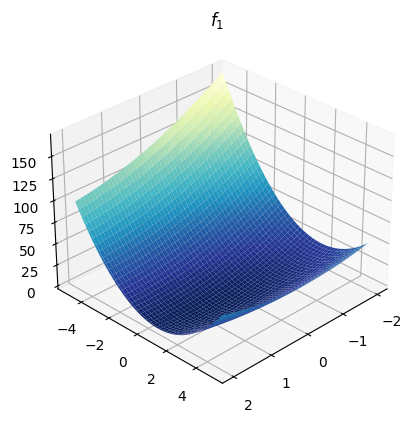

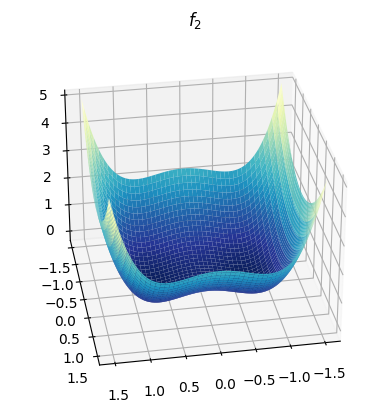

In [5]:
N = 501
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=45)
X,Y = np.meshgrid(np.linspace(-2,2,N),np.linspace(-5,5,N))
ax.plot_surface(X,Y, 2*(X+Y-2)**2 + (X-Y)**2, cmap=plt.cm.YlGnBu_r)
plt.title('$f_1$')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=80)
X,Y = np.meshgrid(np.linspace(-1.5,1.5,N),np.linspace(-1.5,1.5,N))
ax.plot_surface(X,Y, X**4 - X**2 + Y**2 , cmap=plt.cm.YlGnBu_r)
plt.title('$f_2$')




**Exercice 1:** Calculer les gradients et les Hessiennes des deux fonctions

>**Réponse :** On trouve les gradients
$$
\nabla f_1(x) = \begin{pmatrix}6x+2y-8\\6y+2x-8\end{pmatrix}, \quad  \nabla f_2(x) = \begin{pmatrix}4x^3 - 2x \\ 2y \end{pmatrix}.
$$
Ainsi que les hessiennes
$$
H[f_1](x) = \begin{pmatrix}6&2\\2&6\end{pmatrix}, \quad H[f_2](x) = \begin{pmatrix}12x^2 - 2 & 0\\ 0 &2 \end{pmatrix} 
$$

**Exercice 2:**
1. Donner les points critiques des fonctions proposées.
2. Les fonctions $f_i$ admettent-elles des extrema sur $\mathbb{R}^2$?

> **Réponse :**
Les points critiques des fonctions $f_i$ vérifient :
$$\nabla f_1(x) = 0 \quad \Leftrightarrow \quad x = \begin{pmatrix} 1\\1 \end{pmatrix},$$
et 
$$\nabla f_3(x) = 0 \quad \Leftrightarrow \quad x = (0,0), x = \left(\pm \sqrt{\frac{1}{2}}, 0 \right)$$
On remarque que
$$\det(H[f_1](x)) = \det\begin{pmatrix}6&2\\2&6\end{pmatrix}=32>0 \quad\text{ et }\quad \textrm{Tr}(H[f_1](x)) = 12>0,$$
donc $(1,1)$ est un minimum local de la fonction $f_1$.

>Pour $f_2$, les matrices hessinenne aux points $x = \left(\pm \sqrt{\frac{1}{2}}, 0 \right)$ sont définies positives.  Les points $x = \left(\pm \sqrt{\frac{1}{2}}, 0 \right)$ sont ainsi des minima locaux de $f_2$. La hessienne en $x = (0,0)$ a pour valeurs propres $2$ et $-2$. Le point $x = (0,0)$ est donc un point selle de $f_2$.

> Les minimua locaux sont globaux.

## II. Algorithmes de descente

Un algorithme générique de descente possède la forme suivante:

* **Données :**
  * $x_0\in \mathbb{R}^n$ point initial arbitraire
  * une fonction oracle $[f(x),\nabla f(x),H[f](x)]= \textrm{oracle}(x)$
* **Initialisation :** Itération: $k=0$.
* **Tant que** le critère d'arrêt n'est pas satisfait, **faire**
  * Calcul de la direction de descente $d_k$.
  * Choix/Calcul du pas $s_k$.
  * Mise à jour: calcul du prochain itéré $x_{k+1}$.
  * $k = k + 1.$

### 1. Oracles

La fonction $\textit{oracle}$ permet de fournir toutes les informations nécessaires sur la fonction à minimiser à l'algorithme de descente.
A un $x$ donné elle renvoie la valeur $f(x)$ du critère, le gradient $\nabla f(x)$ s'il existe, et éventuellement la matrice Hessienne $H[f](x)$ si elle existe et si nécessaire (algorithme de Newton)

**Exercice 3:** Implémenter les fonctions oracles associées à $f_1$ et $f_2$.

* Les prototypes de ces fonctions sont affichés dans la cellule suivante et doivent être complété.
* En entrée: `x` est un `np.array` de taille `(2,)`
* En sortie:
  * `f` : la valeur de la fonction coût
  * `Df`: un `np.array` de taille `(2,)` contenant le gradient
  * `Hf`: un `np.array` de taille `(2,2)` contenant la matrice Hessienne

In [6]:
def oracle1(x):
    # code
    return f, Df, Hf

def oracle2(x):
    # code
    return f, Df, Hf

In [7]:
def oracle1(x):
    f = 2*(x[0]+x[1]-2)**2+(x[0]-x[1])**2
    Df = np.zeros(2)
    Df[0] = 6*x[0]+2*x[1]-8
    Df[1] = 6*x[1]+2*x[0]-8
    Hf = np.zeros((2,2))
    Hf[0,0] = 6
    Hf[0,1] = 2
    Hf[1,0] = 2
    Hf[1,1] = 6
    return f,Df,Hf

def oracle2(x):
    f = x[0]**4 - x[0]**2 + x[1]**2
    Df = np.zeros(2)
    Df[0] = 4*x[0]**3 - 2*x[0]
    Df[1] = 2*x[1]
    Hf = np.zeros((2,2))
    Hf[0,0] = 12 * x[0]**2 - 2
    Hf[0,1] = 0
    Hf[1,0] = 0
    Hf[1,1] = 2
    return f,Df,Hf


**Exercice 4 :** Vérifier les oracles pour quelques $x$


### 2. Descente de gradient

**Exercice 5:** Implémenter l'algorithme de descente de gradient à pas fixe

$$ x_{k+1} = x_k - s \nabla f(x_k) $$


* Le prototype de la fonction est affiché dans la cellule suivante et doit être complété.
* Le critère d'arrêt sera sur la norme du gradient: $\| \nabla f(x) \| < \epsilon $ et un nombre d'itérations maximal
* Les arguments d'entrée:
    *  `function` sera l'oracle associé à la fonction à minimiser
    *  `step` sera le pas de la méthode de gradient
    *  `x_ini` est le point initial
    *  `eps` correspond à $\epsilon$, la précision requise sur la norme du gradient (par défaut: `eps = 1e-10`)
    *  `iter_max` nombre d'itérations max (pas défaut `itermax = 1000`)
* Les arguments de sortie:
  * `x` l'itéré final
  * `x_iter` un tableau de taille (n, itermax) contenant tous les itérés
  * `cf_iter` un tableau de taille (n) contenant les valeurs de la fonction coût à toutes les itérations
  * `err_iter` un tableau de taille (n) contenant la norme du gradient à toutes les itérations
  * `nb_iter` l'itération finale

Les tableaux `x_iter`, `cf_iter` et `err_iter` peuvent être construits sous forme de liste puis convertis en `np.array` à la fin de la fonction

In [8]:
def gradient_descent(function, step, x_ini, eps = 1e-10, iter_max=1000):
    # Code        
    return x, x_iter, cf_iter, err_iter, nb_iter

In [9]:
def gradient_descent(function, step, x_ini, eps = 1e-10, iter_max=1000):
    x = np.copy(x_ini)
    x_iter = [] # liste des itérés
    cf_iter = [] # liste des valeurs de la fonction cout
    err_iter = [] # liste des normes du gradient
        
    nb_iter = 0
    err = 2*eps

    for nb_iter in range(iter_max):
        f,Df,Hf = function(x)
        err = np.linalg.norm(Df)

        x_iter.append(x)
        cf_iter.append(f)
        err_iter.append(err)
        
        if err < eps:
            break 
        
        # étape de descente
        x = x - step*Df
        nb_iter += 1
        
    x_iter = np.array(x_iter)
    cf_iter = np.array(cf_iter)
    err_iter = np.array(err_iter)
    
        
    return x, x_iter, cf_iter, err_iter, nb_iter

### 3. Méthode de Newton locale

**Exercice 6:** Implémenter la méthode de Newton locale.

$$ x_{k+1} = x_k - H[f](x_k)^{-1} \nabla f(x_k) $$

* Le prototype de la fonction est affiché dans la cellule suivante et doit être complété.
* Le critère d'arrêt sera sur la norme du gradient: $\| \nabla f(x) \| < \epsilon $ et un nombre d'itérations maximal
* Les arguments d'entrée:
    *  `function` sera l'oracle associé à la fonction à minimiser
    *  `x_ini` est le point initial
    *  `eps` correspond à $\epsilon$, la précision requise sur la norme du gradient (par défaut: `eps = 1e-10`)
    *  `iter_max` nombre d'itérations max (pas défaut `itermax = 1000`)
* Les arguments de sortie:
  * `x` l'itéré final
  * `x_iter` un tableau de taille (n, itermax) contenant tous les itérés
  * `cf_iter` un tableau de taille (n) contenant les valeurs de la fonction coût à toutes les itérations
  * `err_iter` un tableau de taille (n) contenant la norme du gradient à toutes les itérations
  * `nb_iter` l'itération finale

Les tableaux `x_iter`, `cf_iter` et `err_iter` peuvent être construits sous forme de liste puis convertis en `np.array` à la fin de la fonction.

Le calcul de $H[f](x_k)^{-1} \nabla f(x_k)$ pourra se réaliser à l'aide de la fonction `np.linalg.solve`

In [10]:
def newton_descent(function, x_ini, eps = 1e-10, iter_max=1000):
    #code         
    return x, x_iter, cf_iter, err_iter, nb_iter

In [11]:
def newton_descent(function, x_ini, eps = 1e-10, iter_max=1000):
    x = np.copy(x_ini)
    x_iter = [] # liste des itérés
    cf_iter = [] # liste des valeurs de la fonction cout
    err_iter = [] # liste des normes du gradient
        
    nb_iter = 0
    err = 2*eps

    for nb_iter in range(iter_max):
        f,Df,Hf = function(x)
        err = np.linalg.norm(Df)

        x_iter.append(x)
        cf_iter.append(f)
        err_iter.append(err)
        
        if err < eps:
            break 
        
        # étape de descente
        x = x - np.linalg.solve(Hf,Df)
        nb_iter += 1

    x_iter = np.array(x_iter)
    cf_iter = np.array(cf_iter)
    err_iter = np.array(err_iter)
    
        
    return x, x_iter, cf_iter, err_iter, nb_iter

## III. Evaluation des performances

Dans cette section, les algorithmes de descente seront évalués sur les fonctions $f_1$ $f_2$
Dans ce but, on se propose de :
* représenter la suite des itérés sur les courbes de niveau des fonctions
* suivre la décroissance (en semilogy)
    * de la fontion coût
    * de la norme du gradient

Les fonctions suivantes permettent de tracer les suites des itérés sur les courbes des niveaux des fonctions $f_1$ et $f_2$
Etudier et comprendre leur code.

In [12]:
def plot_iter_f1(x_iter):
    Nx = 1000
    Ny = 1000
    x = np.linspace(-1.5,3.5,Nx)
    y = np.linspace(-1.5,3.5,Ny)
    X, Y = np.meshgrid(x, y)
    Z=2*(X+Y-2)**2+(X-Y)**2 
    CS=plt.contour(X, Y, Z,[0,0.1,1,2,4,6,8,12,16,20,24],colors='k')
    plt.plot(x_iter[:,0], x_iter[:,1],'o-')
    plt.clabel(CS, inline=1, fontsize=10)

def plot_iter_f2(x_iter):
    Nx = 1000
    Ny = 1000
    x = np.linspace(-2,2,Nx)
    y = np.linspace(-2,2,Ny)
    X, Y = np.meshgrid(x, y)
    Z= X**4 - X**2 + Y **2
    CS=plt.contour(X, Y, Z,[0,0.1,0.5,2,5],colors='k')
    plt.plot(x_iter[:,0], x_iter[:,1],'-o')
    plt.clabel(CS, inline=1, fontsize=10)


### 1. Fonction $f_1$

**Exercice 7:** 
Pour $f_1$ tester la descente de gradient pour 
| Points initiaux $x_0$ | Les pas $s$ |
| ----------------|-------------|
| $(1,2)$ | 0.1 |
| $(10,10)$  | 0.1 |
| $(1,2)$ | 0.3 |
| $(1,2)$ | 0.01 |

> **Commentaires**
> | Points initiaux $x_0$ | Les pas $s$ | Commentaires |
> | ----------------|-------------|---------------|
> | $(1,2)$ | 0.1 | Convergence |
> | $(10,10)$  | 0.1 | Convergence |
> | $(1,2)$ | 0.3 | Pas trop grand, diverge |
> | $(1,2)$ | 0.01 | Convergence lente, pas trop petit | 

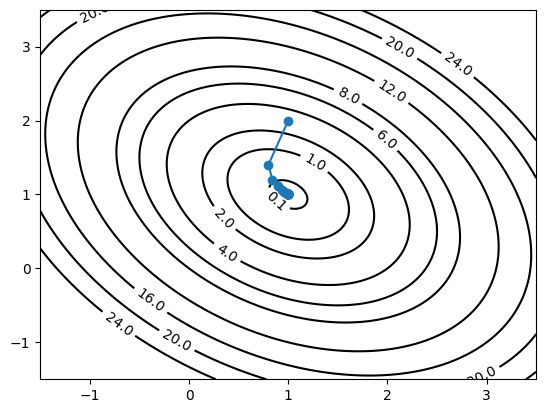

a : convergence vers  [1. 1.]  nb iterations :  48


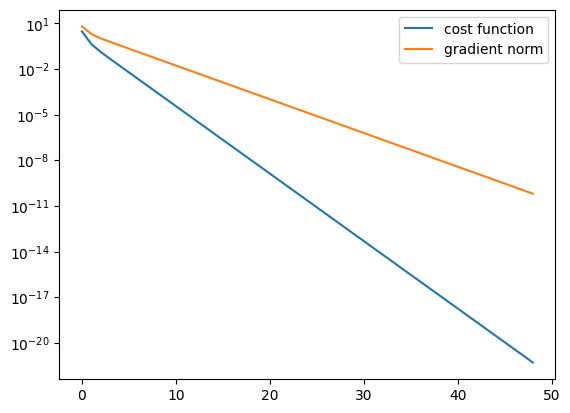

In [13]:
x,x_iter,cf_iter, err_iter, nb_iter = gradient_descent(oracle1, step = 0.1, x_ini = np.array([1,2]))
plot_iter_f1(x_iter)
plt.show()
print("a : convergence vers ",x," nb iterations : ",nb_iter)

plt.semilogy( cf_iter )
plt.semilogy( err_iter )
# plt.semilogy( np.power(0.6, np.arange(nb_iter) ) )  # pour observer convergence linéaire, constante à adapter
plt.legend(['cost function', 'gradient norm'])

**Exercice 8:** Pour $f_1$ tester la méthode de Netwon avec les points initiaux $x_0 = (1,2), (10,10^{10})$

> **Commentaires** Convergence en une itération

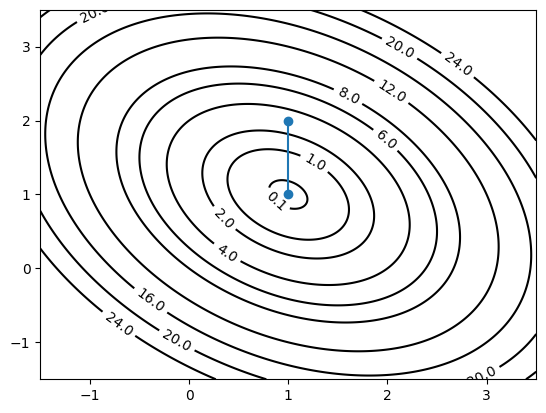

a : convergence vers  [1. 1.]  nb iterations :  1


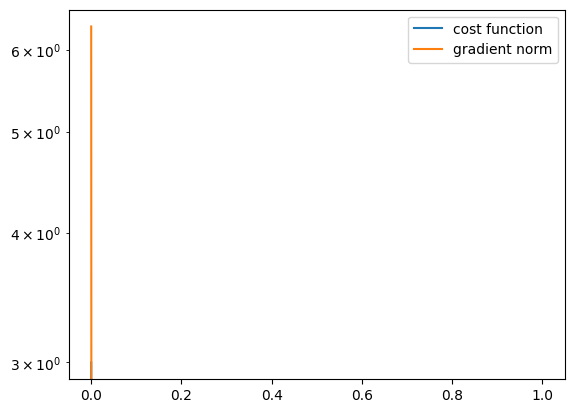

In [14]:
x,x_iter,cf_iter, err_iter, nb_iter = newton_descent(oracle1,x_ini = np.array([1,2]))
plot_iter_f1(x_iter)
plt.show()
print("a : convergence vers ",x," nb iterations : ",nb_iter)

plt.semilogy( cf_iter )
plt.semilogy( err_iter )
plt.legend(['cost function', 'gradient norm'])

### 2. Fonction $f_2$

**Exercice 8:** 
Pour $f_2$ tester la descente de gradient avec 1000 itérations pour 
| Points initiaux $x_0$ | Les pas $s$ |
| ----------------|-------------|
| $(0,0)$ | 0.1 |
| $(0,1.5)$  | 0.01 |
| $(0.01,1.5)$  | 0.1 |
| $(-0.01,1.5)$ | 0.1 |
| $(1,1.5)$ | 0.4|
| $(1,1.5)$ | 0.99 |
| $(1,1.5)$ | 1 |
| $(1,1.5)$ | 1.1 |

> **Commentaires**
> | Points initiaux $x_0$ | Les pas $s$ | Commentaires |
> | ----------------|-------------|-------------------|
> | $(0,0)$ | 0.1 | Convergence vers point selle |
> | $(0,1.5)$  | 0.01 | Convergence lente vers point selle|
> | $(0.01,1.5)$  | 0.1 | Petite perturbation de $x_0$, convergence vers min local | 
> | $(-0.01,1.5)$ | 0.1 | Autre perturbation de $x_0$, convergence vers un autre min local |
> | $(1,1.5)$ | 0.4| Convergence vers min local |
> | $(1,1.5)$ | 0.99 | Pas de convergence en 10000 itérations |
> | $(1,1.5)$ | 1 | Altèrne entre (1,1.5) et (-1,-1.5) |
> | $(1,1.5)$ | 1.01 | Diverge |

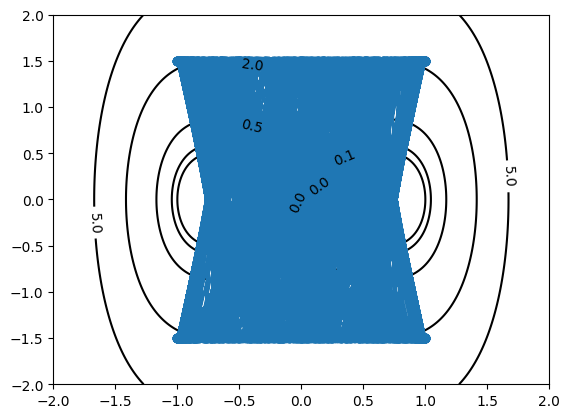

a : convergence vers  [0.88733115 1.5       ]  nb iterations :  1000


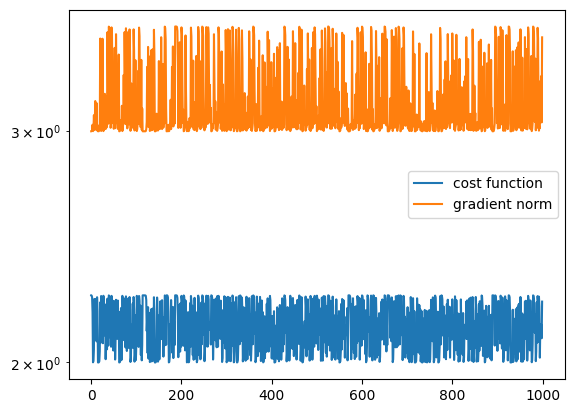

In [17]:
x,x_iter,cf_iter, err_iter, nb_iter = gradient_descent(oracle2, step = 1, x_ini = np.array([0.01,1.5]), iter_max = 1000)
plot_iter_f2(x_iter)
plt.show()
print("a : convergence vers ",x," nb iterations : ",nb_iter)


plt.semilogy( cf_iter )
plt.semilogy( err_iter )
plt.legend(['cost function', 'gradient norm'])

**Exercice 9:** 
Pour $f_2$ tester la méthode de Netwon avec les points initiaux $x_0 = (0,1.5), (0.3,1.5), (1,1.5), (10,1000)$

> **Commentaires**
>* $(0,1.5)$: Convergence en une itération vers point selle
>* $(0.3,1.5)$: Convergence vers point selle (remarquer la correction de la première direction de descente)
>* $(1,1.5)$: Convergence vers point selle (remarquer la correction de la première direction de descente)
>* $(10,1000)$: Convergence min local (sur cet exemple, on peut appercevoir la convergence quadratique)

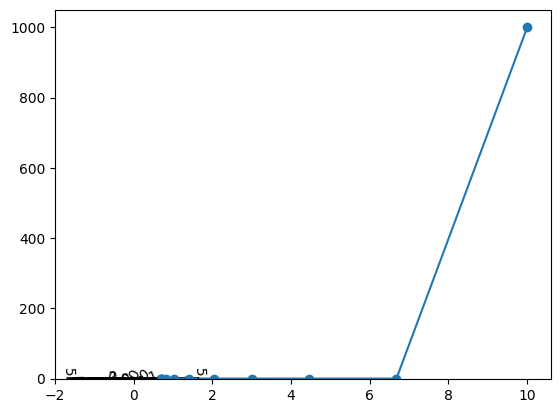

a : convergence vers  [0.70710678 0.        ]  nb iterations :  11


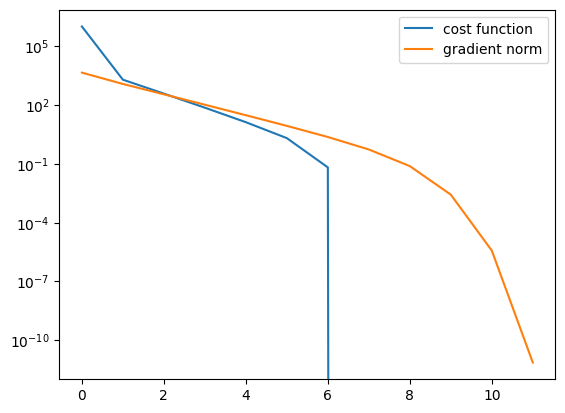

In [16]:
x,x_iter,cf_iter, err_iter, nb_iter = newton_descent(oracle2, x_ini = np.array([10,1000]))
plot_iter_f2(x_iter)
plt.show()
print("a : convergence vers ",x," nb iterations : ",nb_iter)


plt.semilogy( cf_iter )
plt.semilogy( err_iter )
# plt.semilogy( np.power(0.95, np.power(2., np.arange(nb_iter) ) )) # pour x_0 = (10,1000)
plt.legend(['cost function', 'gradient norm'])

### 3. Discussion

**Exercice 10:**  Discuter des résultats obtenus.

> On peut observer que:
>* Le choix du pas est important pour la convergence de la descente de gradient. Trop grand, divergence possible, trop petit convergence lente. Pour certaines intialisations et pas, l'algo peut ne pas converger.
>* Les méthodes de descente convergent vers un point critique. Quand plusieurs points critiques existent, l'initialisation détermine la convergence: convergence locale.
>* La convergence de la descente de gradient apparaît être linéaire $O(\rho^k)$ avec $\rho \in ]0,1[$ (preuve dans le cours suivant)
>* L'algorithme de Newton converge bien plus vite (convergence quadratique $O(\rho^{2^k})$ avec $\rho \in ]0,1[$). Pas besoin de fixer un pas. Inversion d'un système linéaire, qui peut être très couteuse !
>* Quand la fonction est quadratique ($f_1$) la convergence de Newton demande une itération